In [136]:
# ================================
# 1. IMPORT LIBRARIES
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [137]:
# ================================
# 2. LOAD DATASET
# ================================
import kagglehub

path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")
wine_dataset = pd.read_csv(path + "/winequality-red.csv")

wine_dataset.head()


Using Colab cache for faster access to the 'red-wine-quality-cortez-et-al-2009' dataset.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [138]:
# ================================
# 3. DATA INSPECTION
# ================================
wine_dataset.shape


(1599, 12)

In [139]:
wine_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [140]:
wine_dataset.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


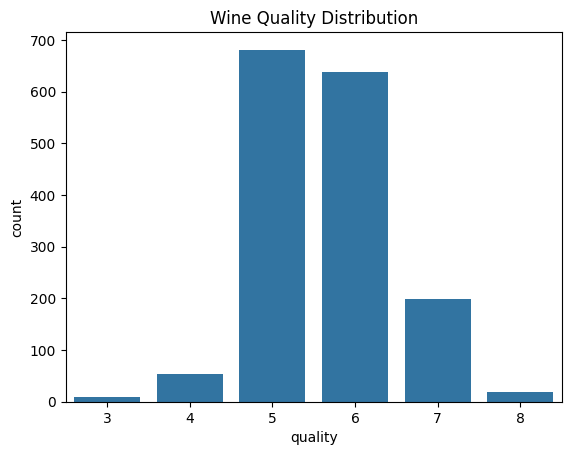

In [141]:
# ================================
# 4. EXPLORATORY DATA ANALYSIS
# ================================

sns.countplot(x='quality', data=wine_dataset)
plt.title("Wine Quality Distribution")
plt.show()


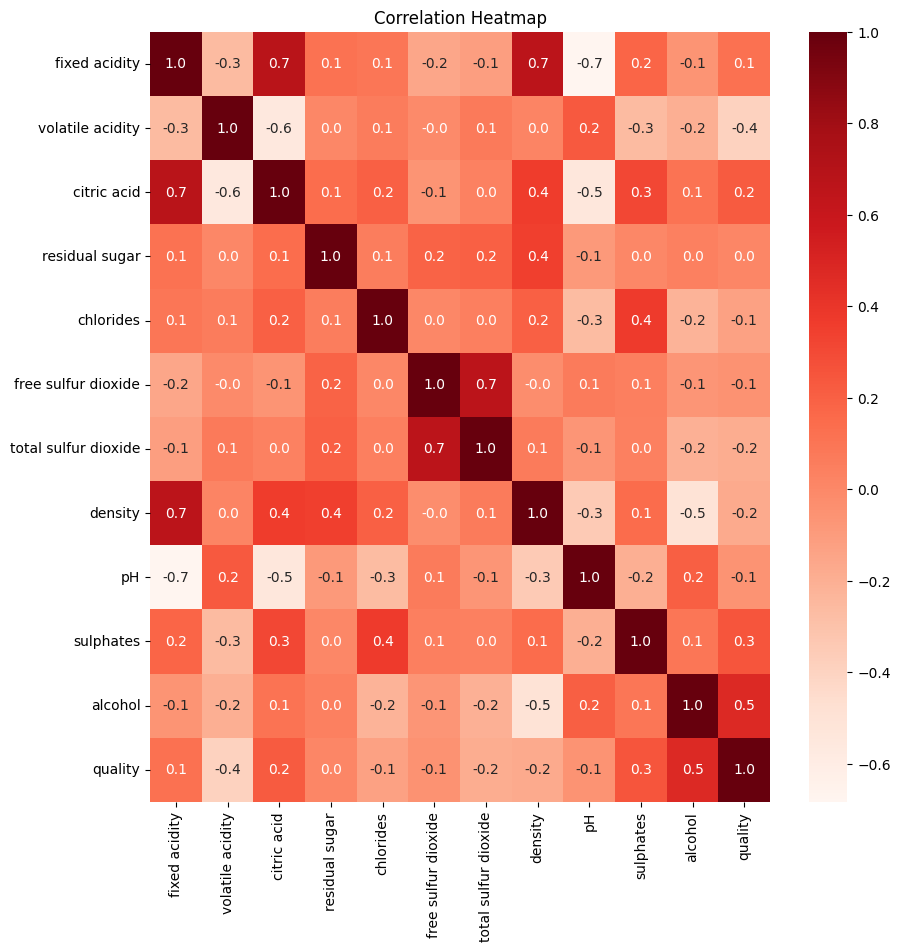

In [142]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_dataset.corr(), annot=True, cmap='Reds', fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()


In [143]:
# ================================
# 5. DATA PREPROCESSING
# ================================

# Features
X = wine_dataset.drop('quality', axis=1)

# Label binarization
# Good wine = quality >= 7
Y = wine_dataset['quality'].apply(lambda y: 1 if y >= 7 else 0)

print(Y.value_counts())


quality
0    1382
1     217
Name: count, dtype: int64


In [144]:
# ================================
# 6. TRAIN TEST SPLIT (STRATIFIED)
# ================================

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    stratify=Y,
    random_state=42
)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(1279, 11) (320, 11)
(1279,) (320,)


In [145]:
# ================================
# 7. MODEL TRAINING
# ================================

model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [146]:
# ================================
# 8. MODEL EVALUATION
# ================================

Y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n")
print(classification_report(Y_test, Y_pred))


Accuracy: 0.946875

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       277
           1       0.96      0.63      0.76        43

    accuracy                           0.95       320
   macro avg       0.95      0.81      0.87       320
weighted avg       0.95      0.95      0.94       320



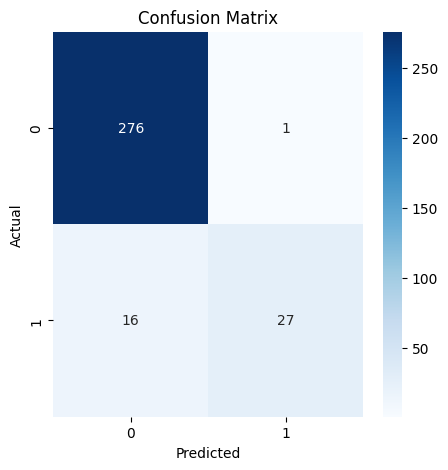

In [147]:
# Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


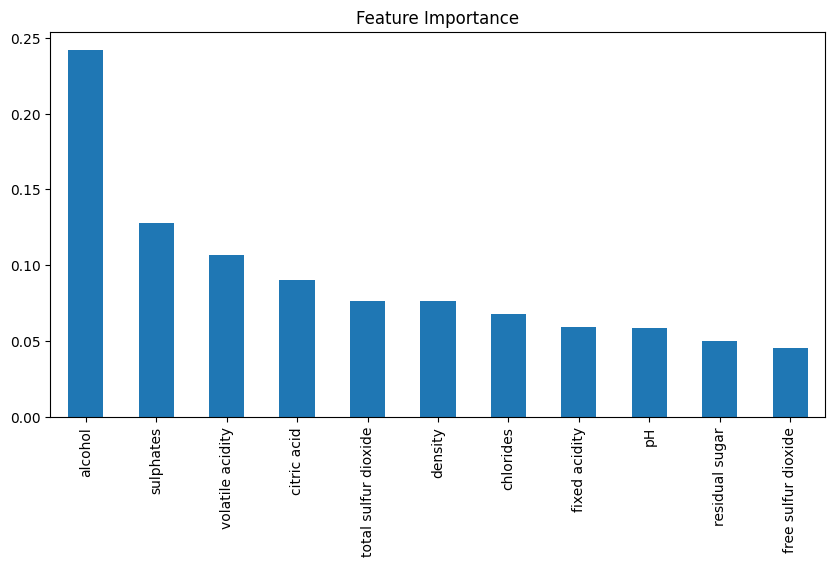

In [148]:
# ================================
# 9. FEATURE IMPORTANCE
# ================================

feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()


In [154]:
# ================================
# 10. INFERENCE (PREDICTION)
# ================================

# input_data = (
#     8.1, 0.38, 0.28, 2.1, 0.066,
#     13.0, 30.0, 0.9968, 3.23,
#     0.73, 9.7
# )

input_data=(7.2, 0.30, 0.34, 2.0, 0.065,18.0, 45.0, 0.9955, 3.40,0.90, 11.8)

input_array = np.asarray(input_data).reshape(1, -1)

prediction = model.predict(input_array)
probability = model.predict_proba(input_array)[0][1]

print("Good Wine Probability:", probability)

threshold = 0.55

if probability >= threshold:
    print("🍷 Good Quality Wine")
else:
    print("❌ Bad Quality Wine")


Good Wine Probability: 0.6
🍷 Good Quality Wine
